In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
data=pd.read_csv("imdb_top_1000.csv")
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# Identify Missing Values 

In [72]:
print(data.info())
null=data.isnull()
print(null.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None
Poster_Link        0
Series_Titl

### Summary of Missing Values in the Dataset
Certificate: 101 missing values.
Meta_score: 157 missing values.
Gross: 169 missing values.
### Approach to Handle Missing Data:
1.Certificate: Filled with a placeholder value like 'Unknown'.
2.Meta_score: Filled with the median value of the column.
3.Gross: Cleaned and converted to numeric, with missing values filled with 0.

In [73]:
data['Certificate'].fillna("Unknown",inplace=True)
data['Meta_score'].fillna(data['Meta_score'].median(),inplace=True)
data['Gross'].fillna("0",inplace=True)

### Verifying missing values are handled or not

In [74]:
data.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

# Data Exploration

### Summary Statistics

In [75]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,1000.000000,1.000000e+03
mean,7.949300,78.133000,2.736929e+05
std,0.275491,11.368225,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,72.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,85.250000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


### Categorical Data Exploration

In [76]:
print(data['Certificate'].value_counts())

Certificate
U           234
A           197
UA          175
R           146
Unknown     101
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64


In [77]:
print(data['Genre'].value_counts())

Genre
Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64


In [78]:
print(data['Director'].value_counts())

Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: count, Length: 548, dtype: int64


# Data Visualization

### 1. Scatter Plot: Meta Score vs IMDB Rating

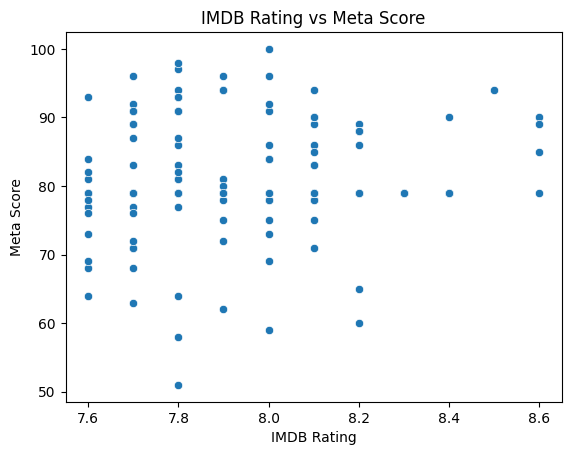

In [79]:

sns.scatterplot(data=data_cleaned, x="IMDB_Rating", y="Meta_score")
plt.title('IMDB Rating vs Meta Score')
plt.xlabel("IMDB Rating")
plt.ylabel("Meta Score")
plt.show()


### 2. Distribution of IMDB Ratings:

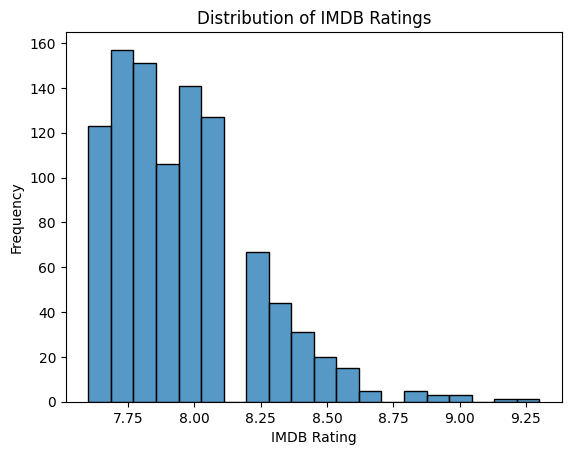

In [80]:
sns.histplot(data["IMDB_Rating"],bins=20)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()       

### 3. Top Movie Genres:

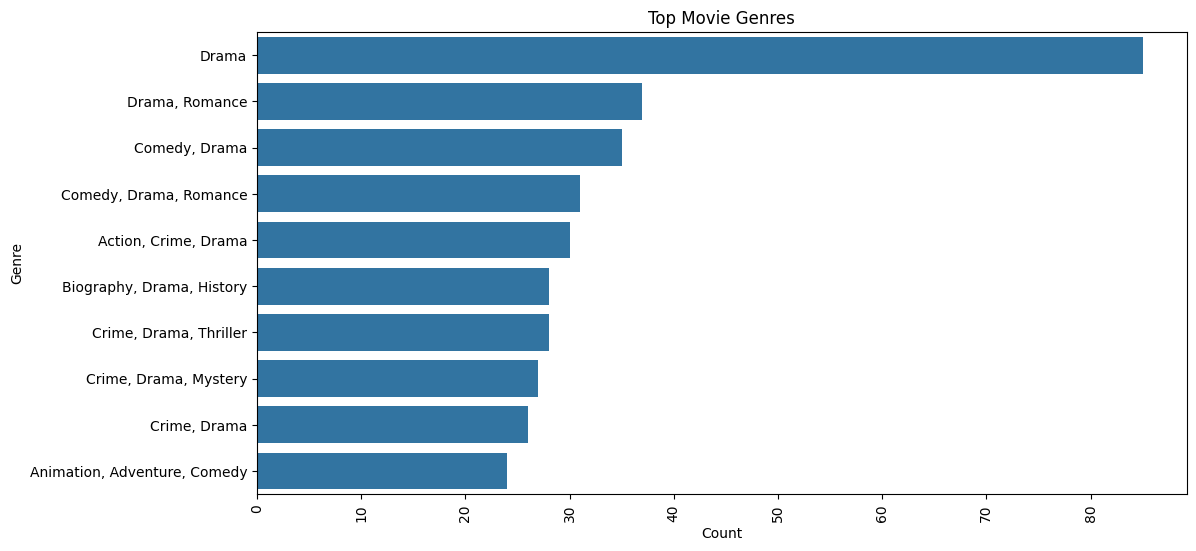

In [81]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(data=data, y='Genre', order=data['Genre'].value_counts().head(10).index)
plt.title('Top Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

### 4.Runtime vs IMDB Rating

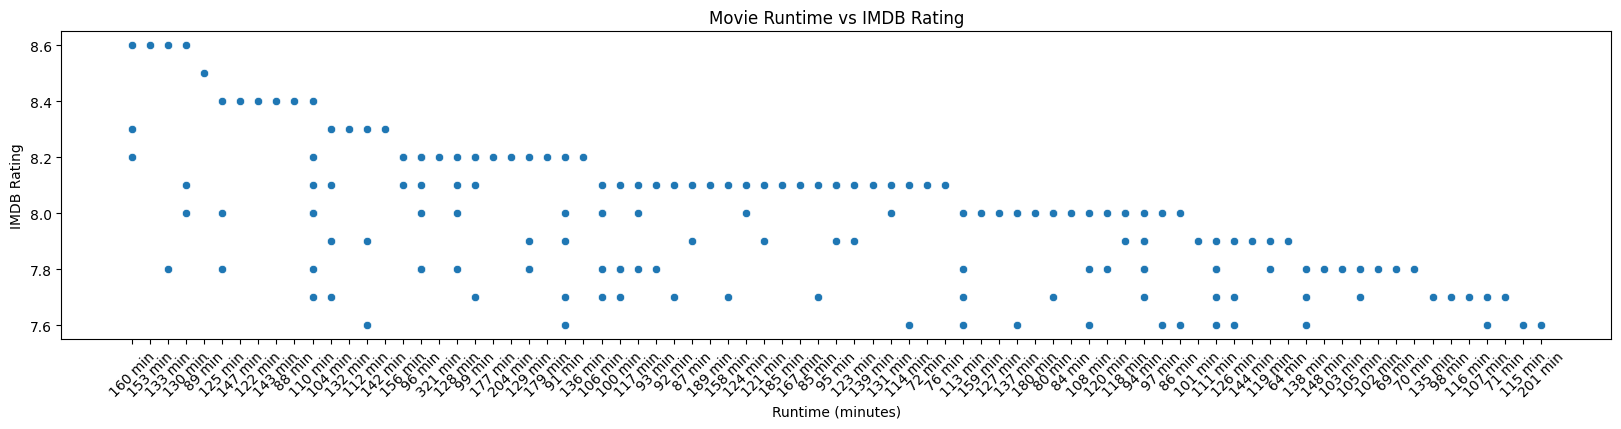

In [98]:
plt.figure(figsize=(20,4))
sns.scatterplot(data=data_cleaned, x="Runtime", y="IMDB_Rating")
plt.title('Movie Runtime vs IMDB Rating')
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDB Rating")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.show()


# Correlation Analysis 

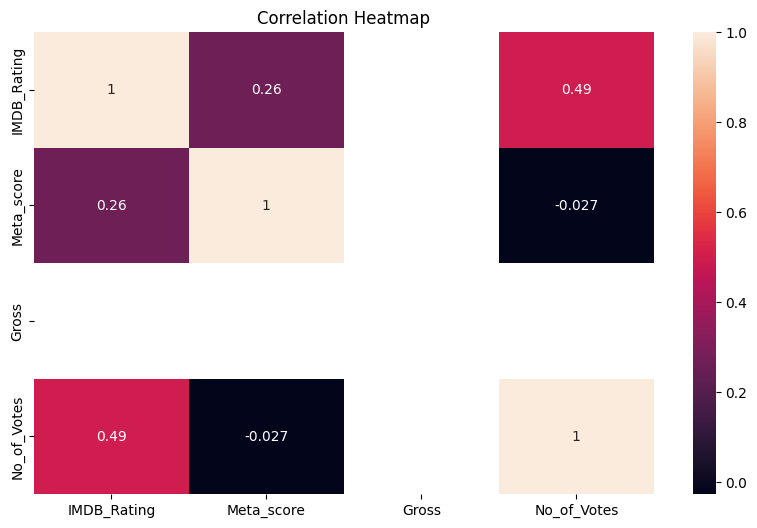

In [83]:
data["Gross"]=data["Gross"].replace({",":" "},regex=True)
data["Gross"] = pd.to_numeric(data["Gross"], errors="coerce")
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data[["IMDB_Rating", "Meta_score", "Gross", "No_of_Votes"]].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


# Insights Generation

### Identify directors whose movies received the most audience votes:

In [84]:
votes_director = data.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False)
print(votes_director.head(20))


Director
Christopher Nolan       11578345
Quentin Tarantino        8123208
Steven Spielberg         7817166
David Fincher            6607859
Martin Scorsese          6513530
Peter Jackson            6148579
James Cameron            4613107
Ridley Scott             4339890
Robert Zemeckis          4055464
Stanley Kubrick          3919254
Francis Ford Coppola     3815137
Frank Darabont           3490904
Anthony Russo            3044263
Alfred Hitchcock         2696577
Clint Eastwood           2683825
Pete Docter              2526411
Sam Mendes               2373036
Hayao Miyazaki           2348718
Denis Villeneuve         2178467
Guy Ritchie              2137767
Name: No_of_Votes, dtype: int64


### Sorted List of Series by Rating

In [85]:
Rating_Title = data.groupby('IMDB_Rating')['Series_Title'].apply(list).sort_index(ascending=False)
print(Rating_Title.head(10))



IMDB_Rating
9.3                           [The Shawshank Redemption]
9.2                                      [The Godfather]
9.0    [The Dark Knight, The Godfather: Part II, 12 A...
8.9    [The Lord of the Rings: The Return of the King...
8.8    [Inception, Fight Club, The Lord of the Rings:...
8.7    [The Lord of the Rings: The Two Towers, The Ma...
8.6    [Hamilton, Gisaengchung, Soorarai Pottru, Inte...
8.5    [Joker, Whiplash, The Intouchables, The Presti...
8.4    [Capharnaüm, Ayla: The Daughter of War, Vikram...
8.3    [1917, Tumbbad, Andhadhun, Drishyam, Jagten, J...
Name: Series_Title, dtype: object


### find how many times stars (actors/actresses) appear in movies in the dataset

In [86]:
# Combine all stars into a single series
all_stars = pd.concat([data['Star1'], data['Star2'], data['Star3'], data['Star4']])
# Count the frequency of each star
star_count = all_stars.value_counts()
# Display the most frequently appearing stars
print(star_count.head(10)) 


Robert De Niro       17
Tom Hanks            14
Al Pacino            13
Clint Eastwood       12
Brad Pitt            12
Leonardo DiCaprio    11
Matt Damon           11
Christian Bale       11
James Stewart        10
Ethan Hawke           9
Name: count, dtype: int64


### Number of appearances of the stars in movies

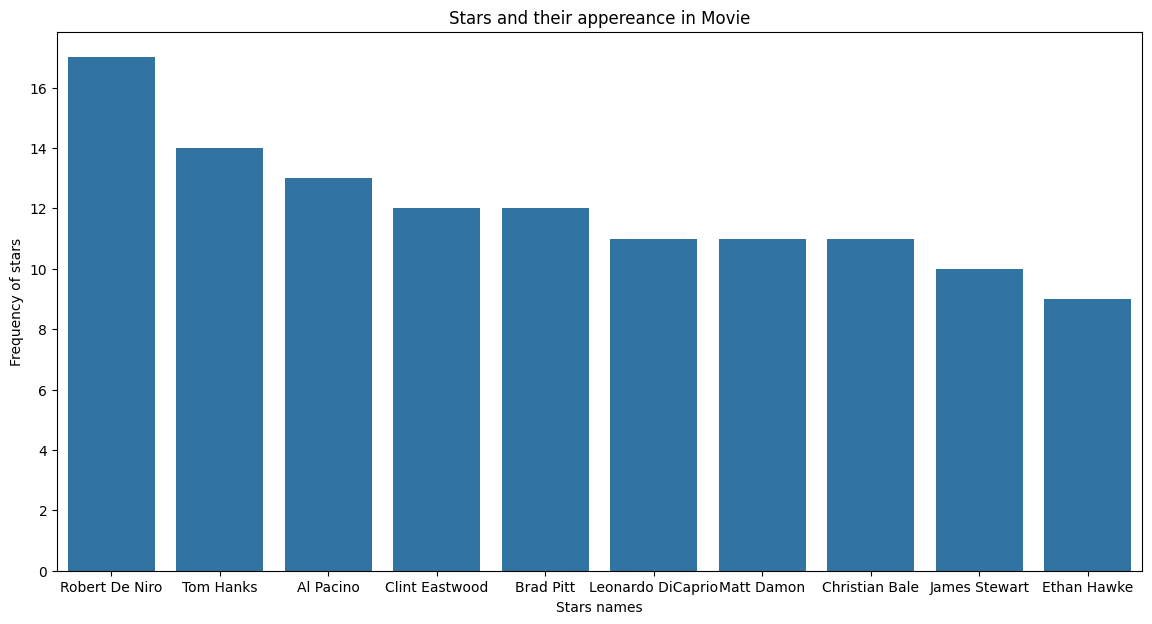

In [87]:
star_names=star_count.head(10).index
star_No_of_app=star_count.head(10).values
plt.figure(figsize=(14,7))
sns.barplot(x=star_names,y=star_No_of_app)
plt.title("Stars and their appereance in Movie")
plt.xlabel("Stars names")
plt.ylabel("Frequency of stars")
plt.show()

### Geners by No. of Votes

Genre
Drama                           17720455
Action, Adventure, Sci-Fi       14635798
Crime, Drama                    10655273
Animation, Adventure, Comedy     9894322
Crime, Drama, Thriller           9769403
Action, Adventure, Drama         9295859
Drama, Romance                   9038356
Action, Crime, Drama             8520797
Crime, Drama, Mystery            6938538
Biography, Drama, History        6809363
Name: No_of_Votes, dtype: int64


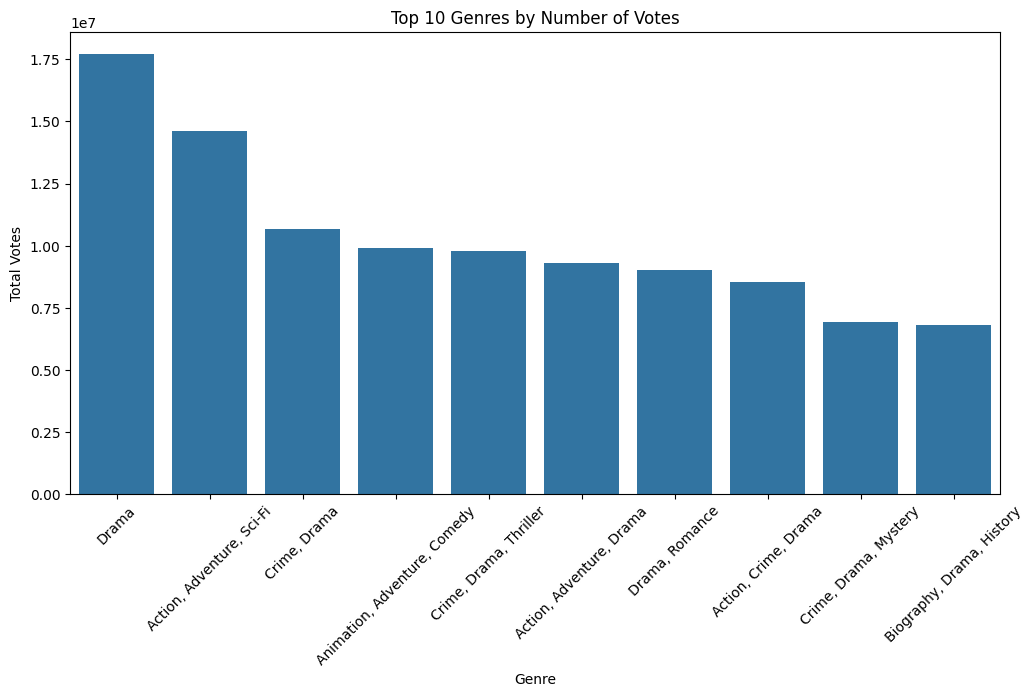

In [88]:
# Group by Genre and sum the votes for each genre
genre_votes = data.groupby('Genre')['No_of_Votes'].sum().sort_values(ascending=False)
# Display the genre with the highest number of votes
print(genre_votes.head(10))  # Display top 10 genres with the most votes
# Plotting the top 10 genres by votes
plt.figure(figsize=(12,6))
sns.barplot(x=genre_votes.head(10).index, y=genre_votes.head(10).values)
plt.title('Top 10 Genres by Number of Votes')
plt.xlabel('Genre')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability(neede because of overlapping)
plt.show()


In [99]:
print(len(data))

1000


In [100]:
print(data['Series_Title'].nunique())


999


In [101]:
duplicates = data[data.duplicated(subset='Series_Title')]
print(duplicates)


                                           Poster_Link Series_Title  \
136  https://m.media-amazon.com/images/M/MV5BYmJhZm...     Drishyam   

    Released_Year Certificate  Runtime                  Genre  IMDB_Rating  \
136          2015          UA  163 min  Crime, Drama, Mystery          8.2   

                                              Overview  Meta_score  \
136  Desperate measures are taken by a man who trie...        79.0   

            Director       Star1         Star2 Star3         Star4  \
136  Nishikant Kamat  Ajay Devgn  Shriya Saran  Tabu  Rajat Kapoor   

     No_of_Votes  Gross  
136        70367    NaN  
